In [1]:
# Example of decoding analysis on iEEG data using LBCN data format and MNE_python & scikit-learn
# Pedro Pinheiro-Chagas
# LBCN_2018

In [2]:
# Import Libraries
from initDirs import dirs
from prepDataDecoding import prepDataDecoding
from decoding_schemes import Decoding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Subjects
subject = 'S13_57_TVD'
# Project name
project_name = 'MMR'
# Conditions to decode
conditions = [['math_memory', 'math_memory']]

In [4]:
# Additional processing params
baselinecorr = 'nobaseline'
estimator = 'LogisticRegression' # or Classification, NeuralNet
dec_scorer = 'accuracy' 
gatordiag = 'gat'
decimate = 10

In [5]:
# Prepare data
params = prepDataDecoding(dirs, subject, project_name, conditions[0][0], conditions[0][1], baselinecorr, decimate)
# Run the decoding and retrieve the scores
scores = Decoding(params, estimator, dec_scorer, gatordiag)
# Update times, since data was decimated
times = np.linspace(-0.5,5,np.size(params['times']))

importing calc data
The measurement information indicates a low-pass frequency of 500 Hz. The decim=10 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
done
selecting data
math_memory
math_memory
done
{'subject': 'S13_57_TVD', 'baseline_correction': 'nobaseline', 'train_set': 'math_memory', 'test_set': 'math_memory', 'train_times': {'start': -0.2, 'stop': 3.2}, 'test_times': {'start': -0.2, 'stop': 3.2}, 'times': array([-0.49999997, -0.48999997, -0.47999997, -0.46999997, -0.45999998,
       -0.44999998, -0.43999998, -0.42999998, -0.41999998, -0.40999998,
       -0.39999998, -0.38999998, -0.37999998, -0.36999998, -0.35999998,
       -0.34999998, -0.33999998, -0.32999998, -0.31999998, -0.30999998,
       -0.29999998, -0.28999998, -0.27999998, -0.26999999, -0.25999999,
       -0.24999999, -0.23999999, -0.22999999, -0.21999999, -0.20999999,
       -0.19999999, -0.18999999, -0.17999999, -0.16999999, -0.15999999,
       -0.14999999, -0.13999999, -0

/Users/pinheirochagas/Pedro/Stanford/code/lbcn_decoding_demo/prepDataDecoding.py:30: RuntimeWarning: The measurement information indicates a low-pass frequency of 500 Hz. The decim=10 parameter will result in a sampling frequency of 100 Hz, which can cause aliasing artifacts.
  epochs.decimate(decimate)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   4 | elapsed:    6.1s remaining:    6.1s


decoding subject S13_57_TVD done!
results size is: 240 bytes
saving results
saving done
/Volumes/neurology_jparvizi$/decoding_demo/results/individual_results/math_memory_math_memory/S13_57_TVD_math_memory_math_memory_results_LogisticRegression_accuracy_gat_nobaseline


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:   11.4s finished


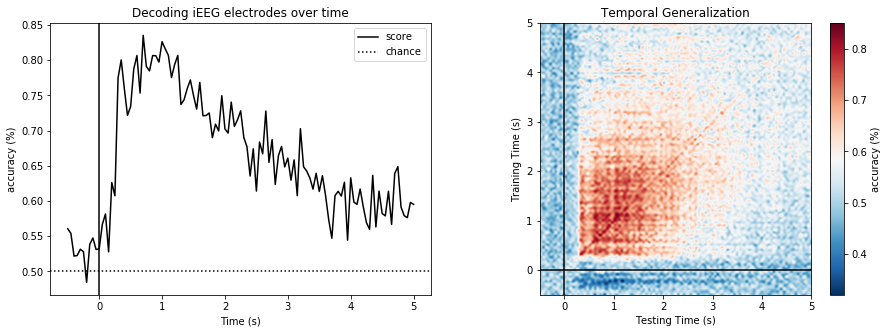

In [6]:
# Mean scores across cross-validation splits
score_avg = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))

ax1.plot(times, np.diag(score_avg), label='score', color='k')
ax1.axhline(.5, color='k', linestyle=':', label='chance')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('accuracy (%)')
ax1.legend()
ax1.axvline(.0, color='k', linestyle='-')
ax1.set_title('Decoding iEEG electrodes over time')

# Plot the full matrix
im = ax2.imshow(score_avg, interpolation='lanczos', origin='lower', cmap='RdBu_r', extent=times[[0, -1, 0, -1]])
ax2.set_xlabel('Testing Time (s)')
ax2.set_ylabel('Training Time (s)')
ax2.set_title('Temporal Generalization')
ax2.axvline(0, color='k')
ax2.axhline(0, color='k')
cb = plt.colorbar(im, ax=ax2)
cb.set_label('accuracy (%)')

plt.show()